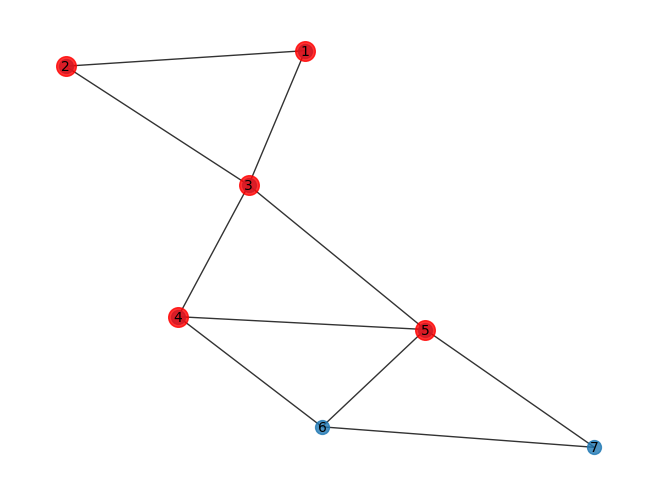

Seed nodes: [1, 2, 3, 4, 5]


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

def influence_maximization(g_, k_, eta_, l_):

    seed_set = set()  # Initialize empty seed set
    for _ in range(eta_):
        # Compute spread for each initial node
        spread = {}
        for node in g_.nodes():
            if node not in seed_set:
                s = 0
                for _ in range(l_):
                    # Extract a random subgraph induced by the seed set and the current node
                    subgraph = nx.DiGraph(g_.subgraph(list(seed_set) + [node]))

                    # Compute spread of subgraph starting from current node
                    s += compute_spread(subgraph, node)

                # Compute average spread over multiple iterations
                spread[node] = s / l_

        # Add node with maximum spread to seed set
        max_node = max(spread, key=spread.get)
        seed_set.add(max_node)

    return list(seed_set)


def compute_spread(g_, node):

    # Initialize set of activated nodes with starting node
    activated = set([node])

    # Iterate until no new nodes are activated
    while True:
        new_activated = False
        for u in g_.nodes():
            # Skip nodes that are already activated
            if u in activated:
                continue

            # Compute activation probability
            num_active_neighbors = len([v for v in g_.predecessors(u) if v in activated])
            num_neighbors = len(list(g_.predecessors(u)))
            if num_neighbors == 0:
                activation_prob = 0.0
            else:
                activation_prob = num_active_neighbors / num_neighbors

            # Activate node with probability activation_prob
            if random.random() < activation_prob:
                activated.add(u)
                new_activated = True

        if not new_activated:
            break

    return len(activated)

# Define graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=100, alpha=0.8)

# Highlight seed nodes
seed_nodes = influence_maximization(G, k=3, eta=5, l=10)
nx.draw_networkx_nodes(G, pos=pos, nodelist=seed_nodes, node_color='r', node_size=200, alpha=0.8)

# Add labels
labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10)

# Display graph
plt.show()

# Print seed nodes
print("Seed nodes: " + str(seed_nodes))

کد قبلی هست فقط یکسری پارامترها تغییر کرده هست



مثل : node_size=300

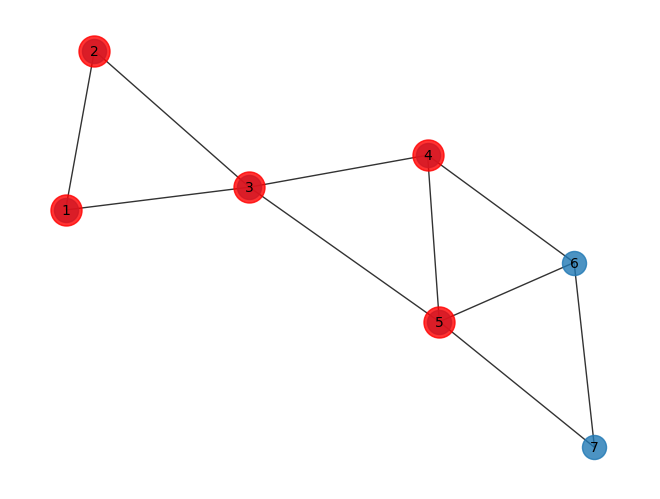

Seed nodes: [1, 2, 3, 4, 5]


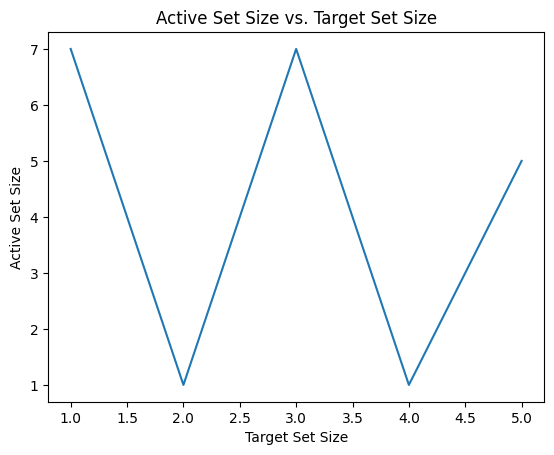

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def influence_maximization(g_, k_, eta_, l_):

    seed_set_ = set()  # Initialize empty seed set
    target_sizes_ = []  # Initialize list for target set sizes
    active_sizes_ = []  # Initialize list for active set sizes

    for _ in range(eta_):
        # Compute spread for each initial node
        spread = {}
        for node in g_.nodes():
            if node not in seed_set_:
                s = 0
                for _ in range(l_):
                    # Extract a random subgraph induced by the seed set and the current node
                    subgraph = nx.DiGraph(g_.subgraph(list(seed_set_) + [node]))

                    # Compute spread of subgraph starting from current node
                    s += compute_spread(subgraph, node)

                # Compute average spread over multiple iterations
                spread[node] = s / l_

        # Add node with maximum spread to seed set
        max_node = max(spread, key=spread.get)
        seed_set_.add(max_node)

        # Calculate target set size and active set size
        target_sizes_.append(len(seed_set_))
        active_sizes_.append(compute_spread(g_, max_node))

    return list(seed_set_), target_sizes_, active_sizes_


def compute_spread(g_, node):

    # Initialize set of activated nodes with starting node
    activated = set([node])

    # Iterate until no new nodes are activated
    while True:
        new_activated = False
        for u in g_.nodes():
            # Skip nodes that are already activated
            if u in activated:
                continue

            # Compute activation probability
            num_active_neighbors = len([v for v in g_.neighbors(u) if v in activated])
            num_neighbors = len(list(g_.neighbors(u)))
            if num_neighbors == 0:
                activation_prob = 0.0
            else:
                activation_prob = num_active_neighbors / num_neighbors

            # Activate node with probability activation_prob
            if random.random() < activation_prob:
                activated.add(u)
                new_activated = True

        if not new_activated:
            break

    return len(activated)


# Define graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=300, alpha=0.8)

# Highlight seed nodes
seed_nodes, target_sizes, active_sizes = influence_maximization(G, k_=3, eta_=5, l_=10)
nx.draw_networkx_nodes(G, pos=pos, nodelist=seed_nodes, node_color='r', node_size=500, alpha=0.8)

# Add labels
labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10)

# Display graph
plt.show()

# Print seed nodes
print("Seed nodes: " + str(seed_nodes))

# Plot active set size vs. target set size
plt.plot(target_sizes, active_sizes)
plt.xlabel('Target Set Size')
plt.ylabel('Active Set Size')
plt.title('Active Set Size vs. Target Set Size')
plt.show()


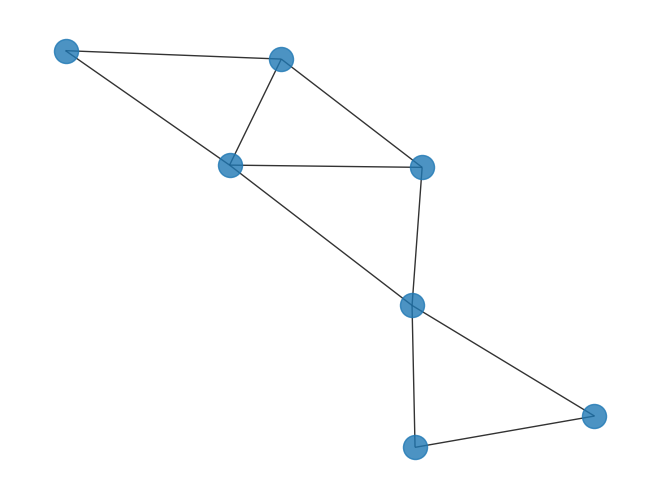

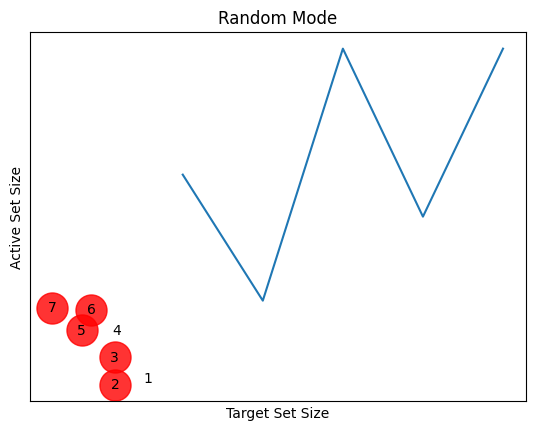

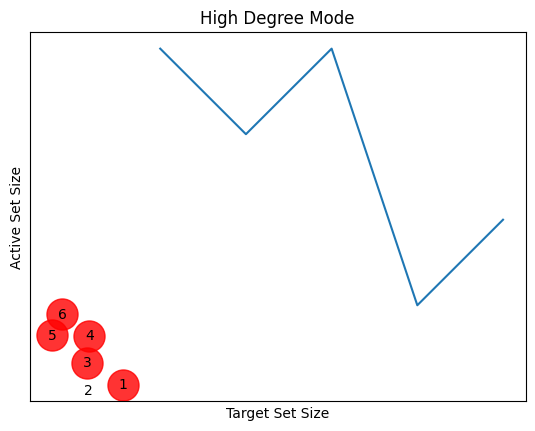

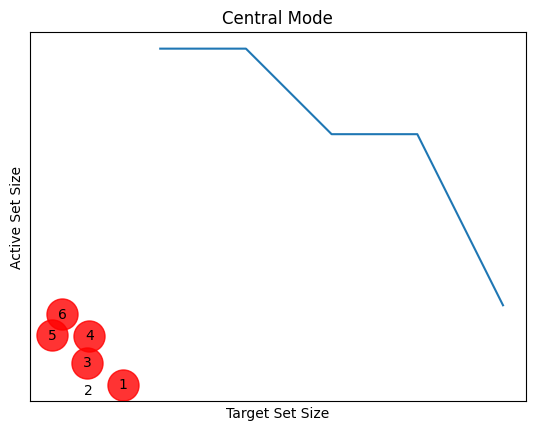

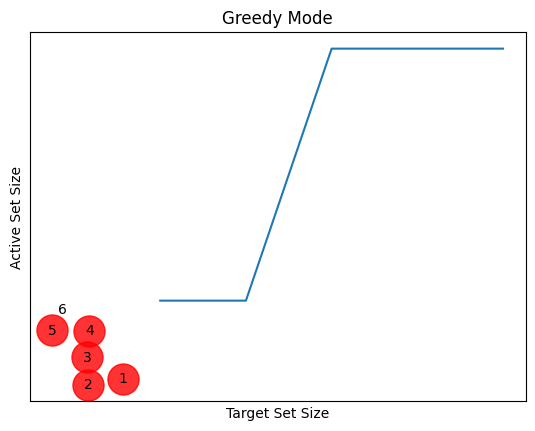

In [24]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def influence_maximization(g_, k_, eta_, l_, mode_):

    seed_set_ = set()  # Initialize empty seed set
    target_sizes_ = []  # Initialize list for target set sizes
    active_sizes_ = []  # Initialize list for active set sizes

    for _ in range(eta_):
        # Compute spread for each initial node
        spread = {}
        for node in g_.nodes():
            if node not in seed_set_:
                s = 0
                for _ in range(l_):
                    # Extract a random subgraph induced by the seed set and the current node
                    subgraph = nx.DiGraph(g_.subgraph(list(seed_set_) + [node]))

                    # Compute spread of subgraph starting from current node
                    s += compute_spread(subgraph, node)

                # Compute average spread over multiple iterations
                spread[node] = s / l_

        if mode == 'random':
            # Select a random node as the next seed node
            max_node = random.choice(list(spread.keys()))
        elif mode == 'high degree':
            # Select the node with the highest degree as the next seed node
            max_node = max(spread, key=lambda node_: g_.degree(node_))
        elif mode == 'central':
            # Select the node with the highest closeness centrality as the next seed node
            max_node = max(spread, key=lambda node_: nx.closeness_centrality(g_)[node_])
        elif mode == 'greedy':
            # Select the node with the maximum marginal gain as the next seed node
            max_node = max(spread, key=spread.get)
        else:
            raise ValueError("Invalid mode. Please choose from: random, high degree, central, greedy.")

        # Add node with maximum spread to seed set
        seed_set_.add(max_node)

        # Calculate target set size and active set size
        target_sizes_.append(len(seed_set_))
        active_sizes_.append(compute_spread(g_, max_node))

    return list(seed_set_), target_sizes_, active_sizes_


def compute_spread(g, node):

    # Initialize set of activated nodes with starting node
    activated = set([node])

    # Iterate until no new nodes are activated
    while True:
        new_activated = False
        for u in g.nodes():
            # Skip nodes that are already activated
            if u in activated:
                continue

            # Compute activation probability
            num_active_neighbors = len([v for v in g.neighbors(u) if v in activated])
            num_neighbors = len(list(g.neighbors(u)))
            if num_neighbors == 0:
                activation_prob = 0.0
            else:
                activation_prob = num_active_neighbors / num_neighbors

            # Activate node with probability activation_prob
            if random.random() < activation_prob:
                activated.add(u)
                new_activated = True

        if not new_activated:
            break

    return len(activated)


# Define graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])

# Draw graph
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=300, alpha=0.8)

# Random mode
plt.figure()
seed_nodes, target_sizes, active_sizes = influence_maximization(G, k=3, eta=5, l=10, mode='random')
nx.draw_networkx_nodes(G, pos=pos, nodelist=seed_nodes, node_color='r', node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10)
plt.plot(target_sizes, active_sizes)
plt.xlabel('Target Set Size')
plt.ylabel('Active Set Size')
plt.title('Random Mode')
plt.show()

# High degree mode
plt.figure()
seed_nodes, target_sizes, active_sizes = influence_maximization(G, k=3, eta=5, l=10, mode='high degree')
nx.draw_networkx_nodes(G, pos=pos, nodelist=seed_nodes, node_color='r', node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10)
plt.plot(target_sizes, active_sizes)
plt.xlabel('Target Set Size')
plt.ylabel('Active Set Size')
plt.title('High Degree Mode')
plt.show()

# Central mode
plt.figure()
seed_nodes, target_sizes, active_sizes = influence_maximization(G, k=3, eta=5, l=10, mode='central')
nx.draw_networkx_nodes(G, pos=pos, nodelist=seed_nodes, node_color='r', node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10)
plt.plot(target_sizes, active_sizes)
plt.xlabel('Target Set Size')
plt.ylabel('Active Set Size')
plt.title('Central Mode')
plt.show()

# Greedy mode
plt.figure()
seed_nodes, target_sizes, active_sizes = influence_maximization(G, k=3, eta=5, l=10, mode='greedy')
nx.draw_networkx_nodes(G, pos=pos, nodelist=seed_nodes, node_color='r', node_size=500, alpha=0.8)
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=10)
plt.plot(target_sizes, active_sizes)
plt.xlabel('Target Set Size')
plt.ylabel('Active Set Size')
plt.title('Greedy Mode')
plt.show()


در انتهای این کد نحوه نمایش متفاوتی ارائه می شود

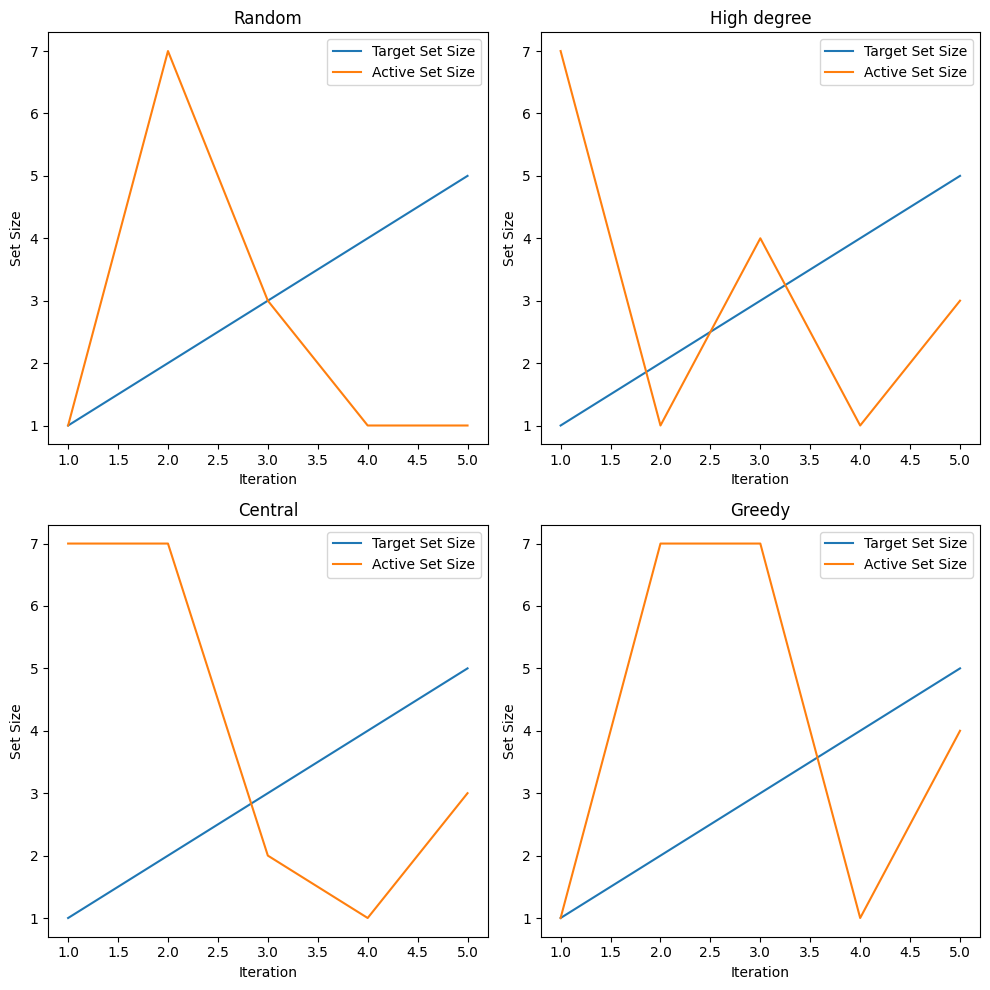

In [25]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def influence_maximization(g_, k_, eta_, l_, mode_):

    seed_set_ = set()  # Initialize empty seed set
    target_sizes_ = []  # Initialize list for target set sizes
    active_sizes_ = []  # Initialize list for active set sizes

    for _ in range(eta_):
        # Compute spread for each initial node
        spread = {}
        for node in g_.nodes():
            if node not in seed_set_:
                s = 0
                for _ in range(l_):
                    # Extract a random subgraph induced by the seed set and the current node
                    subgraph = nx.DiGraph(g_.subgraph(list(seed_set_) + [node]))

                    # Compute spread of subgraph starting from current node
                    s += compute_spread(subgraph, node)

                # Compute average spread over multiple iterations
                spread[node] = s / l_

        if mode == 'random':
            # Select a random node as the next seed node
            max_node = random.choice(list(spread.keys()))
        elif mode == 'high degree':
            # Select the node with the highest degree as the next seed node
            max_node = max(spread, key=lambda node_: g_.degree(node_))
        elif mode == 'central':
            # Select the node with the highest closeness centrality as the next seed node
            max_node = max(spread, key=lambda node_: nx.closeness_centrality(g_)[node_])
        elif mode == 'greedy':
            # Select the node with the maximum marginal gain as the next seed node
            max_node = max(spread, key=spread.get)
        else:
            raise ValueError("Invalid mode. Please choose from: random, high degree, central, greedy.")

        # Add node with maximum spread to seed set
        seed_set_.add(max_node)

        # Calculate target set size and active set size
        target_sizes_.append(len(seed_set_))
        active_sizes_.append(compute_spread(g_, max_node))

    return list(seed_set_), target_sizes_, active_sizes_


def compute_spread(g_, node):

    # Initialize set of activated nodes with starting node
    activated = set([node])

    # Iterate until no new nodes are activated
    while True:
        new_activated = False
        for u in g_.nodes():
            # Skip nodes that are already activated
            if u in activated:
                continue

            # Compute activation probability
            num_active_neighbors = len([v for v in g_.neighbors(u) if v in activated])
            num_neighbors = len(list(g_.neighbors(u)))
            if num_neighbors == 0:
                activation_prob = 0.0
            else:
                activation_prob = num_active_neighbors / num_neighbors

            # Activate node with probability activation_prob
            if random.random() < activation_prob:
                activated.add(u)
                new_activated = True

        if not new_activated:
            break

    return len(activated)



# Define graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

modes = ['random', 'high degree', 'central', 'greedy']

# Iterate over modes and plot graphs
for i, mode in enumerate(modes):
    # Select subplot
    ax = axs[i // 2, i % 2]

    # Perform influence maximization
    seed_nodes, target_sizes, active_sizes = influence_maximization(G, k=3, eta=5, l=10, mode=mode)

    # Plot target set size
    ax.plot(range(1, len(target_sizes) + 1), target_sizes, label='Target Set Size')

    # Plot active set size
    ax.plot(range(1, len(active_sizes) + 1), active_sizes, label='Active Set Size')

    # Set title and labels
    ax.set_title(mode.capitalize())
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Set Size')

    # Add legend
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


، نمودار نمایش داده می‌شود تا مقایسه‌ای بین استراتژی‌های مختلف انجام شود و تأثیر هر استراتژی در اندازه مجموعه هدف و مجموعه فعال قابل مشاهده باشد

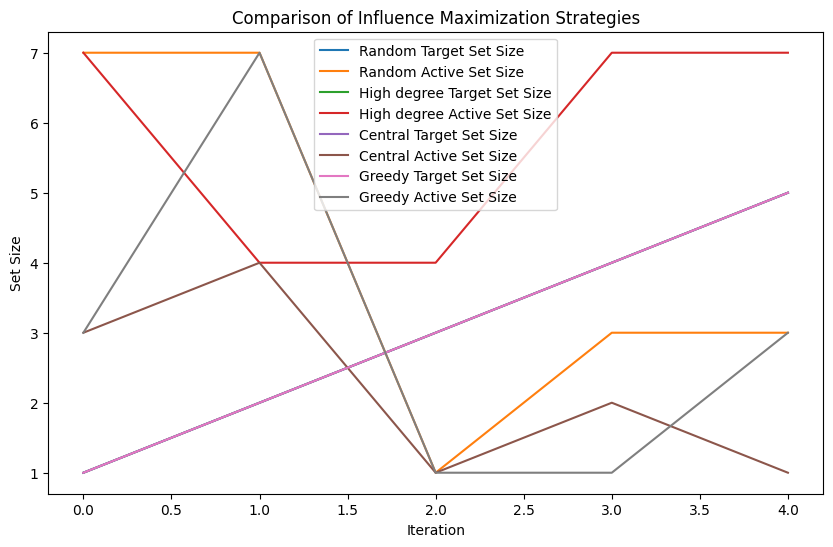

In [26]:
import networkx as nx
import random
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])


plt.figure(figsize=(10, 6))


k = 3
eta = 5
l = 10

modes = ['random', 'high degree', 'central', 'greedy']


for mode in modes:
    seed_nodes, target_sizes, active_sizes = influence_maximization(G, k, eta, l, mode)

    plt.plot(target_sizes, label=mode.capitalize()+' Target Set Size')
    plt.plot(active_sizes, label=mode.capitalize()+' Active Set Size')


plt.title('Comparison of Influence Maximization Strategies')
plt.xlabel('Iteration')
plt.ylabel('Set Size')

plt.legend()

plt.show()


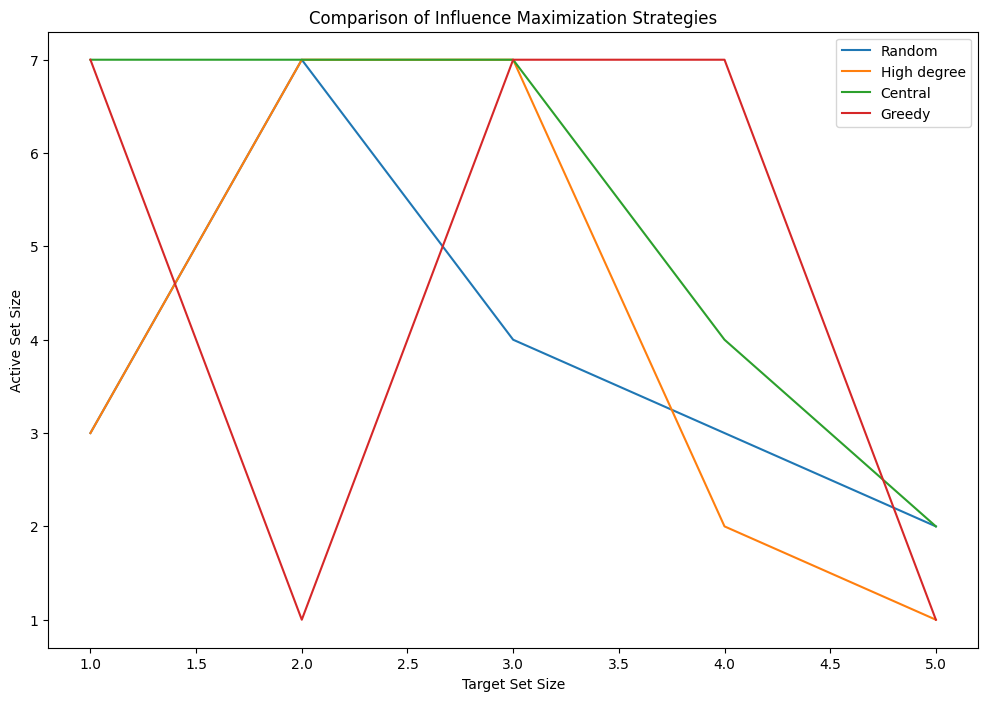

In [27]:
import networkx as nx
import random
import matplotlib.pyplot as plt


G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6), (5, 7), (6, 7)])

plt.figure(figsize=(12, 8))


k = 3
eta = 5
l = 10

modes = ['random', 'high degree', 'central', 'greedy']


plt.title('Comparison of Influence Maximization Strategies')

for mode in modes:
    seed_nodes, target_sizes, active_sizes = influence_maximization(G, k, eta, l, mode)

    plt.plot(target_sizes, active_sizes, label=mode.capitalize())

plt.xlabel('Target Set Size')
plt.ylabel('Active Set Size')
plt.legend()
plt.show()
